# Versionamento

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix, recall_score, precision_score
import datetime

# Load Data

In [2]:
pwbdatafile = '..\\data\\pwb-validation.csv'
pwbds = pd.read_csv(pwbdatafile)

In [3]:
pwbds.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
0,5/28/99 0:00,0,-3.787279,-17.31655,-18.198509,57.900154,0.039098,38.957985,-0.429273,-0.451141,...,-1.689041,-1.8205,1.340184,76.346500,64.423974,-1.470630,0.011490,-100.8105,-0.006499,0
1,5/28/99 0:02,0,-3.787279,-17.31655,-18.198509,59.013069,0.035696,38.966500,-0.429273,-0.451141,...,-1.689041,-1.8205,1.340273,78.859928,69.882226,-2.721852,0.011633,-100.8105,-0.006490,0
2,5/28/99 0:04,0,-3.787279,-17.31655,-18.198509,58.873999,0.032308,38.573860,-0.429273,-0.451141,...,-1.689041,-1.8205,1.340364,73.129703,72.937097,-1.470630,0.011775,-100.8105,-0.006481,0
3,5/28/99 0:06,0,-3.787279,-17.31655,-18.198509,58.734901,0.028905,38.602883,-0.429273,-0.451141,...,-1.689041,-1.8205,1.340453,76.468326,64.661676,-1.775806,0.011917,-100.8105,-0.006472,0
4,5/28/99 0:08,0,-3.787279,-17.31655,-18.198509,58.595831,0.025503,38.996651,-0.429273,-0.451141,...,-1.689041,-1.8205,1.340544,67.490543,63.351892,-2.416676,0.012059,-100.8105,-0.006463,0


In [4]:
pwbds.shape

(709, 63)

In [5]:
pwbds.describe()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,...,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.0
mean,0.004231,-0.873723,3.413932,3.454798,100.595613,-0.051923,18.282197,-0.102798,0.015020,0.062446,...,-1.379587,-1.713313,2.307771,26.856737,-18.218295,-1.216664,0.011369,-4.593376,-0.008512,0.0
std,0.064957,0.929088,6.997472,6.704211,56.071828,0.291105,30.012012,0.095239,0.116496,0.307538,...,0.382531,0.621665,0.618245,47.857491,52.459261,0.425775,0.018339,22.596244,0.002512,0.0
min,0.000000,-3.787279,-17.316550,-18.198509,-35.653772,-0.639964,-66.097557,-0.429273,-0.451141,-0.120087,...,-1.689041,-2.733586,1.340184,-68.247494,-110.513300,-2.840870,-0.013161,-100.810500,-0.012229,0.0
25%,0.000000,-1.275711,1.555028,1.400479,51.189155,-0.261759,18.814217,-0.139347,0.008773,-0.052031,...,-1.689041,-2.176213,1.396549,-7.498593,-40.657843,-1.470630,-0.002306,0.306681,-0.011309,0.0
50%,0.000000,-0.894125,2.224452,2.676851,130.069434,-0.064555,26.289437,-0.089298,0.038986,-0.010220,...,-1.689041,-1.820500,2.606552,13.218204,-32.920111,-1.226490,0.011784,0.598803,-0.008119,0.0
75%,0.000000,-0.005121,3.287998,7.780697,149.016669,0.181814,36.614052,-0.039246,0.058823,0.049901,...,-0.960770,-1.118351,2.700118,70.724674,-2.365637,-0.915699,0.016448,1.053881,-0.006086,0.0
max,1.000000,0.640447,16.742105,13.948689,177.938849,0.930257,59.127266,0.050782,0.288933,4.060033,...,-0.773514,-0.752385,6.637265,185.373111,88.226160,0.085826,0.067249,1.414400,-0.005078,0.0


In [6]:
pwbds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 63 columns):
time    709 non-null object
y       709 non-null int64
x1      709 non-null float64
x2      709 non-null float64
x3      709 non-null float64
x4      709 non-null float64
x5      709 non-null float64
x6      709 non-null float64
x7      709 non-null float64
x8      709 non-null float64
x9      709 non-null float64
x10     709 non-null float64
x11     709 non-null float64
x12     709 non-null float64
x13     709 non-null float64
x14     709 non-null float64
x15     709 non-null float64
x16     709 non-null float64
x17     709 non-null float64
x18     709 non-null float64
x19     709 non-null float64
x20     709 non-null float64
x21     709 non-null float64
x22     709 non-null float64
x23     709 non-null float64
x24     709 non-null float64
x25     709 non-null float64
x26     709 non-null float64
x27     709 non-null float64
x28     709 non-null int64
x29     709 non-null float64
x

In [7]:
pwbds['y'].value_counts()

0    706
1      3
Name: y, dtype: int64

In [8]:
pwbds.loc[pwbds['y']==1]

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
177,5/28/99 5:54,1,0.231069,1.183568,1.780737,74.636116,-0.406168,53.183663,-0.109135,-0.041277,...,-1.689041,-1.875920,1.396549,69.665592,82.686090,-0.616077,0.018050,1.120821,-0.005341,0
204,5/28/99 6:50,1,0.075007,-13.796615,-16.995079,177.938849,-0.240000,57.281533,-0.009339,-0.000993,...,-1.689041,-1.997746,2.452444,80.604312,-19.472189,-1.226490,0.014139,0.717982,-0.005746,0
320,5/28/99 10:50,1,-0.717117,-8.988349,-9.846894,158.351050,-0.114481,42.107338,-0.009339,0.288933,...,-1.689041,-2.520207,2.519503,18.840640,-26.888526,-0.796131,0.031466,1.121523,-0.007481,0


# Feature Selection and Scaling

In [9]:
# Feature Selection
# List of considered Features
# Redução de feature usando resultado do PCA (notebook DimRedPCAOnTS)
FEATURES = [
#    'x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x13','x14','x15','x17','x18','x19','x20',
#    'x21','x22','x24','x26','x27','x28','x29','x30','x32','x33','x34','x35','x36','x37','x38','x39','x40',
#    'x41','x42','x43','x44','x45','x46','x47','x48','x49','x50','x54','x55','x56','x57','x60',
#    'y','x1','x5','x8','x10','x13','x14','x15','x17','x18','x19','x20','x21','x22','x26','x28','x30','x31','x34',
#    'x35','x37','x38','x40','x41','x43','x46','x48','x49','x51','x53','x54','x55','x58'

    'y','x1', 'x2','x3', 'x4', 'x5', 'x8', 'x9', 'x10', 'x11', 'x13','x14', 'x17', 'x18', 'x19',  'x20', 'x21', 'x26', 'x28', 
    'x30', 'x31','x34', 'x35', 'x37',  'x40', 'x41', 'x43', 'x46','x48', 'x51', 'x53', 'x54', 'x55', 'x57', 'x56','x58', 'x60'
]
# Create the dataset with features and filter the data to the list of FEATURES
pwbds_filtered = pwbds[FEATURES]

# Print the tail of the dataframe
pwbds_filtered.tail()

,y,x1,x2,x3,x4,x5,x8,x9,x10,x11,...,x46,x48,x51,x53,x54,x55,x57,x56,x58,x60
704,0,-0.877442,0.786430,0.406426,135.301215,0.112295,0.058823,-0.080108,-0.038189,-0.488246,...,-0.390998,0.027491,29.984624,-0.752385,2.682413,6.944644,-0.860218,-37.795661,0.010220,-0.011242
705,0,-0.843988,0.633086,0.561918,133.228949,0.141332,0.058823,-0.080108,-0.038189,-0.416892,...,-0.634066,0.027201,29.984624,-0.752385,2.683338,0.507755,-0.915699,-39.357199,0.010620,-0.011235
706,0,-0.826547,0.450126,0.334582,134.977973,0.170370,0.048752,-0.080108,-0.038189,-0.391569,...,-0.739459,0.026911,29.984624,-0.752385,2.684263,2.809146,-1.409596,-39.357199,0.013323,-0.011228
707,0,-0.822842,0.419383,0.387263,135.658942,0.199422,0.048752,-0.080108,-0.038189,-0.341133,...,-0.175841,0.026621,29.984624,-0.752385,2.685189,2.164859,-0.860218,-39.357199,0.012888,-0.011221
708,0,-0.840981,0.582710,0.593416,136.339880,0.228460,0.048752,-0.070037,-0.038189,-0.386608,...,-0.050593,0.026331,29.984624,-0.752385,2.686114,1.416690,-0.732044,-39.357199,0.012453,-0.011214


In [10]:
# This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
from sklearn.preprocessing import RobustScaler, MinMaxScaler 

# Get the number of rows in the data
nrows = pwbds_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(pwbds_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)
pwbds_scaled = pd.DataFrame(
    np_data_scaled,
    columns=FEATURES
)

(709, 37)


# Shaping & Splitting

In [11]:
def lstm_data_transform(x_data, y_data, num_steps=5):
    """ Changes data to the format for LSTM training for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        
        # if index is larger than the size of the dataset, we stop
        if end_ix > x_data.shape[0]:
            break
        
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix-1]
        
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

## Dataset for Model 1

In [12]:
pwbds_m1 = pwbds_scaled.copy()
#pwbds_m1.drop('NEXT_H',axis='columns', inplace=True)
yds_m1 = pwbds_m1.pop('y')

In [13]:
num_steps = 10 # Intervalo entre medições é de 2 segundos
x_new, y_new = lstm_data_transform(pwbds_m1, yds_m1, num_steps=num_steps)
print ("The new shape of x is", x_new.shape)

The new shape of x is (700, 10, 36)


In [14]:
np.where(y_new==1)

(array([168, 195, 311], dtype=int64),)

In [15]:
import tensorflow as tf
from tensorflow import keras

model_m1 = keras.models.load_model('../data/pwb_regression')


C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorflow\pyth

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-pac

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
# Verify the architecture 
print(model_m1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 120)           75360     
_________________________________________________________________
dropout (Dropout)            (None, 10, 120)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60)                43440     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 60)                3660      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1

In [17]:
test_predict = model_m1.predict(x_new)

In [18]:
np.where(yds_m1 == 1)

(array([177, 204, 320], dtype=int64),)

In [19]:
yds_m1.tail(40)

669    0.0
670    0.0
671    0.0
672    0.0
673    0.0
674    0.0
675    0.0
676    0.0
677    0.0
678    0.0
679    0.0
680    0.0
681    0.0
682    0.0
683    0.0
684    0.0
685    0.0
686    0.0
687    0.0
688    0.0
689    0.0
690    0.0
691    0.0
692    0.0
693    0.0
694    0.0
695    0.0
696    0.0
697    0.0
698    0.0
699    0.0
700    0.0
701    0.0
702    0.0
703    0.0
704    0.0
705    0.0
706    0.0
707    0.0
708    0.0
Name: y, dtype: float64

In [20]:
test_predict.shape

(700, 1)

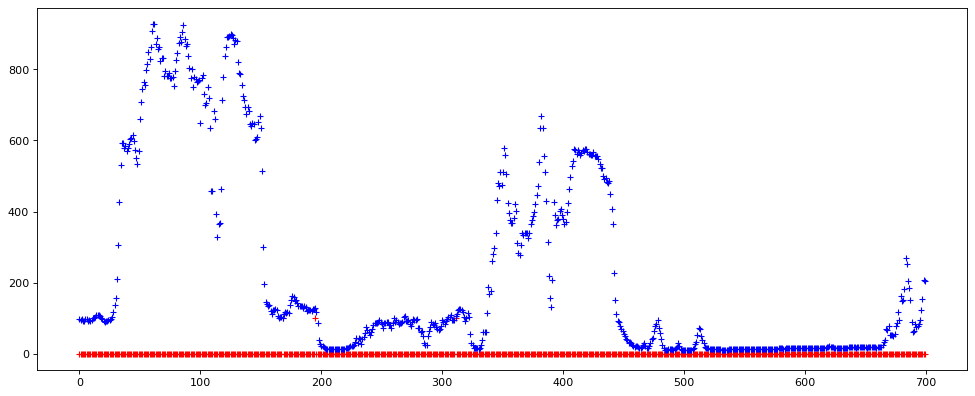

In [21]:
figure(figsize=(15, 6), dpi=80)
plt.plot(y_new*100,'r+')
plt.plot(test_predict,'b+')

In [22]:
results = pd.DataFrame(y_new)
results['preds']=test_predict
results.columns=['true','preds']
results['dif']=round(results['true']-results['preds'],2)
results.to_csv('results.csv')

In [23]:
results.describe()

,true,preds,dif
count,700.000000,700.000000,700.000000
mean,0.004286,228.117752,-228.113514
std,0.065372,275.405914,275.407709
min,0.000000,9.763735,-926.680000
25%,0.000000,17.860227,-403.325000
50%,0.000000,92.347027,-92.345000
75%,0.000000,403.326920,-17.860000
max,1.000000,926.678589,-9.760000


## Truth

### Quantas quebras realmente ocorreram?

In [24]:
# Registro de quebras são aqueles onde RUL==0 (y_test==0)
np.unique(y_new==0,return_counts=True)

(array([False,  True]), array([  3, 697], dtype=int64))

### Quando ocorreram?

In [25]:
break_moments= np.where(y_new == 1)

In [26]:
list(break_moments)

[array([168, 195, 311], dtype=int64)]

## Previsões

### Quantas indicações abaixo de x minutos? 

In [27]:
np.unique(test_predict < 90 ,return_counts=True)

(array([False,  True]), array([357, 343], dtype=int64))

### Quando ocorreram?

In [28]:
np.where(test_predict < 90)[0]

array([ 21, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
       222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 261, 263,
       264, 265, 266, 273, 274, 275, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,
       301, 302, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333,
       334, 335, 336, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       469, 470, 471, 472, 473, 474, 475, 476, 477, 479, 480, 481, 482,
       483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495,
       496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508,
       509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 52

## Acertos
### Quantos e quando?

In [29]:
when_pred = np.where(test_predict < 90)[0].tolist()
when_true = np.where(y_new == 0)[0].tolist()

In [30]:
commonalities = set(when_pred) - (set(when_pred) - set(when_true))

In [31]:
len(commonalities)

343

In [32]:
commonalities

{21,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 261,
 263,
 264,
 265,
 266,
 273,
 274,
 275,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 298,
 299,
 301,
 302,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 446,
 447,
 448,
 449,
 450,
 451,
 452,
 453,
 454,
 455,
 456,
 457,
 458,
 459,
 460,
 461,
 462,
 463,
 464,
 465,
 466,
 467,
 468,
 469,
 470,
 471,
 472,
 473,
 474,
 475,
 476,
 477,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 486,
 487,
 488,
 489,
 490,
 491,
 492,
 493,
 494,
 495,
 496,
 497,
 498,
 499,
 500,
 501,
 502,
 503,
 504,
 505,
 506,

In [33]:
import shap  # package used to calculate Shap values

# use Deep SHAP to explain test set predictions
#k_explainer = shap.KernelExplainer(model_1.predict_proba, x_test)
#k_shap_values = k_explainer.shap_values(x_test.reshape(14315*30,32))
#shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], x_test)